# Group Project

------------------------------------------------------

## Importing the required libraries

In [1]:
import numpy as np
import gurobipy as gp
import pandas as pd
from IPython.display import Markdown as md
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.5f}'.format

## Data Load

In [2]:
#time variable
time_limit=3600

#Load Data for stocks
stocks2020= pd.read_csv('stocks2020.csv')
stocks2020

#Load Data for stocks
stocks2019= pd.read_csv('stocks2019.csv')
stocks2019

,X,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
0,2019-01-02,6360.87012,46.35038,224.57001,18.83000,98.05000,202.11999,1054.68005,1045.84998,1539.13000,...,27.59000,247.97000,147.76000,107.36416,164.08000,63.92076,159.74000,36.31247,46.04186,84.60027
1,2019-01-03,6147.12988,44.70451,215.70000,17.05000,100.21000,184.78000,1025.46997,1016.06000,1500.28003,...,26.96000,243.36000,142.59000,104.08345,163.73000,63.25374,154.02000,33.83533,45.86045,81.41497
2,2019-01-04,6422.66992,46.48836,226.19000,19.00000,106.00000,186.71001,1078.06995,1070.70996,1575.39001,...,28.55000,255.03000,148.97000,108.67841,172.70000,65.35814,163.35001,35.26847,46.30922,85.18471
3,2019-01-07,6488.25000,47.79914,229.26000,20.57000,107.94000,189.92000,1075.92004,1068.39001,1629.51001,...,29.18000,271.00000,151.39999,108.78712,175.85001,65.73391,163.50000,36.52128,46.10871,87.43489
4,2019-01-08,6551.85010,49.24790,232.67999,20.75000,108.61000,192.95000,1085.37000,1076.28003,1656.57996,...,29.48000,276.00000,156.92000,109.75552,178.19000,67.04915,166.95000,36.17010,46.64341,85.76918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2019-12-23,8696.00977,58.50522,328.95001,45.46000,110.46000,278.14002,1350.63000,1348.83997,1793.00000,...,34.66000,253.02000,192.42999,148.81450,219.98000,56.75914,165.61000,61.40175,61.41509,97.68363
247,2019-12-24,8699.50977,58.42574,329.64002,46.54000,110.28000,277.89002,1344.43005,1343.56006,1789.20996,...,34.47000,252.49000,192.75000,148.43637,220.56000,56.54594,166.19000,60.94148,61.65540,97.27868
248,2019-12-26,8778.30957,58.50522,331.20001,46.63000,108.93000,278.26001,1362.46997,1360.40002,1868.77002,...,34.57000,251.33000,193.71001,148.09804,220.25000,57.07894,165.36000,61.49968,61.58674,97.46634
249,2019-12-27,8770.98047,58.80326,330.79001,46.18000,108.55000,277.64002,1354.64001,1351.89001,1869.80005,...,34.61000,253.17000,194.05000,147.84927,220.97000,57.19523,165.85001,60.84355,61.91041,97.20953


## Q1 and Q2

1) Two csv files are included with this assignment. One of those files contains daily prices of the index as well as the component stocks of the NASDAQ-100 in 2019. The first column is the date, the second column is the index price (NDX), and columns 3-102 are the prices of the component stocks. The second file is the same, except it’s 2020 prices. There are actually 103 stocks in the NASDAQ-100 right now, but 3 of them are new stocks that don’t have data for all of 2019, so I just removed them. You’re going to use the 2019 file for all your portfolio construction tasks and then analyze the performance on the 2020 file; that is, how well does your portfolio, constructed with 2019 data, track the index in 2020? When we grade your assignment, we will use different csv files with potentially a different number of days and a different index with a different number of component stocks. You will need to calculate the returns of the stocks in the 2019 file to calculate the correlation matrix for stock selection and weight construction, and you will need the returns of the index for weight construction. You will also need the daily returns in 2020 for both the index and the stocks to evaluate the performance of your portfolio in 2020. Use the correlation matrix of returns as 𝜌.


2) Start with m=5. Find the best 5 stocks to include in your portfolio and the weights of those 5
stocks, using the 2019 data. How well does this portfolio track the index in 2020? That is,
calculate ∑+ 8𝑞 − ∑) 𝑤 𝑟 8 using the 2020 data (except wi is from your 2019 solution...). "*& " !*& ! !"

In [3]:
#Calcuating returns
stocks2019=stocks2019.set_index('X').pct_change()
stocks2020=stocks2020.set_index('X').pct_change()

#correlation matrix
import copy
stocks2019_l1 = copy.deepcopy(stocks2019)
stocks2019_l1=stocks2019_l1.drop(['NDX'], axis=1)
n=stocks2019.shape[1] - 1 
m=5
Corr_mat=stocks2019_l1.corr()
np.fill_diagonal(Corr_mat.values, -2)
Corr_mat

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
ATVI,-2.00000,0.39994,0.36538,0.22316,0.21628,0.43310,0.42678,0.46708,0.20396,0.32935,...,0.32291,0.12824,0.46485,0.31655,0.25968,0.21815,0.31166,0.30308,0.04339,0.24967
ADBE,0.39994,-2.00000,0.45285,0.36893,0.36337,0.55212,0.54040,0.59824,0.29198,0.47382,...,0.36039,0.20115,0.71134,0.54124,0.40217,0.22811,0.65043,0.36152,0.20740,0.28950
AMD,0.36538,0.45285,-2.00000,0.30183,0.34425,0.41886,0.41725,0.54930,0.15145,0.50373,...,0.33278,0.21062,0.49834,0.33090,0.27298,0.28195,0.40763,0.43889,0.01728,0.47801
ALXN,0.22316,0.36893,0.30183,-2.00000,0.33243,0.31599,0.30770,0.36317,0.34202,0.31704,...,0.25714,0.40894,0.35058,0.19149,0.52242,0.19272,0.41640,0.28991,0.04795,0.20036
ALGN,0.21628,0.36337,0.34425,0.33243,-2.00000,0.24875,0.25032,0.39928,0.26460,0.32828,...,0.17596,0.12856,0.36089,0.25185,0.33498,0.21959,0.30897,0.28441,0.08806,0.25393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBA,0.21815,0.22811,0.28195,0.19272,0.21959,0.23290,0.23060,0.28817,0.19449,0.34786,...,0.25705,0.14533,0.19547,0.12612,0.21458,-2.00000,0.21164,0.29631,-0.13080,0.27664
WDAY,0.31166,0.65043,0.40763,0.41640,0.30897,0.37949,0.37183,0.42475,0.21171,0.35173,...,0.23504,0.26955,0.56967,0.40148,0.37605,0.21164,-2.00000,0.31570,0.20924,0.25412
WDC,0.30308,0.36152,0.43889,0.28991,0.28441,0.32862,0.32211,0.41962,0.17262,0.60293,...,0.37721,0.12646,0.33192,0.30856,0.31477,0.29631,0.31570,-2.00000,-0.07612,0.51696
XEL,0.04339,0.20740,0.01728,0.04795,0.08806,0.05993,0.05257,0.07672,0.13786,-0.04726,...,-0.17275,0.07469,0.28037,0.40777,0.19167,-0.13080,0.20924,-0.07612,-2.00000,-0.11755


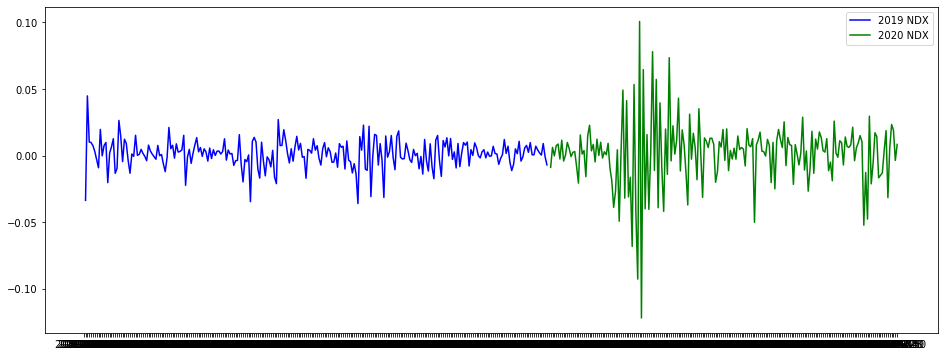

In [4]:
#plotting a stocks return to show the trend
plt.figure(figsize=(16,6))
plt.plot(stocks2019['NDX'], label='2019 NDX', color='blue')
plt.plot(stocks2020['NDX'], label = '2020 NDX', color='green')
plt.legend()

In [5]:
#creating a m_list
stock_count_2019 = len(stocks2019.iloc[:, 1:].columns)
m_list_valid = [5] + [i for i in range(10, stock_count_2019 + 1, 10)]
m_list_valid

[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [6]:
#selecting top 5 stocks
obj = []
for i in range(n):
    for j in range(n):
        obj.append(Corr_mat.iloc[i,j])
obj = np.array(obj+[0]*n)
A = np.zeros((n+n**2+1,n**2+n))
b = np.zeros(n+n**2+1)
n_ranger = np.array(range(n))
q = 0
for j in range(n):
    b[q] = 1
    A[q,j*n + n_ranger] = 1
    q+=1   
for i in range(n):
    for k in n_ranger*n +i:
        b[q] = 0
        A[q, k] = 1
        A[q, -n+i] = -1
        q+=1
A[-1,-n:] = 1
sense = np.array(['=']*n+['<']*n**2+['='])
b[q] = m
vtype=['B']*(n**2+n)
biMod = gp.Model()
biMod_x = biMod.addMVar(n**2+n,vtype=vtype) 
portMod_con = biMod.addMConstrs(A, biMod_x, sense, b)
biMod.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)
biMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
biMod.optimize()
list = []
for i in range(n):
    if biMod_x.x[-n:][i] == 1:
        list.append(stocks2019_l1.columns[i])
stocks2019_l1[list]

Set parameter Username
Academic license - for non-commercial use only - expires 2023-09-11


,LBTYK,MXIM,MSFT,PAYX,VRTX
X,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.00628,-0.05685,-0.03679,-0.01690,-0.00213
2019-01-04,0.06855,0.04400,0.04651,0.03486,0.05479
2019-01-07,-0.04277,0.01039,0.00128,-0.00529,0.01824
2019-01-08,-0.03612,-0.01503,0.00725,0.00759,0.01331
...,...,...,...,...,...
2019-12-23,0.00462,-0.00421,0.00000,-0.00725,-0.00322
2019-12-24,0.00092,-0.00260,-0.00019,-0.00306,0.00264
2019-12-26,-0.01699,0.00653,0.00820,0.00071,-0.00141


In [7]:
#portfolio weight calculation
calculation_df = stocks2019[['NDX'] + list].iloc[1:,:]
calculation_df
t = len(calculation_df)
obj = np.array([1]*t + [0]*m)
A = np.zeros((2*t+1, len(obj)))
b = np.zeros(2*t+1)
sense = np.array(['>']*2*t+['='])
i = 0
y = 0
for row in range(t):
    qt = calculation_df.iloc[row]['NDX']
    rit = calculation_df.iloc[row][list].to_list()
    A[i, y] = 1  
    A[i+1, y] = 1
    A[i, t:] = rit 
    A[i+1, t:] = [-x for x in rit] 
    b[i], b[i+1] = qt, -qt
    i += 2
    y += 1
A[-1,-m:] = [1]*m
b[-1] = 1
biMod = gp.Model()
biMod_x = biMod.addMVar(len(obj)) # vtype can be: 'C' or 'I' or 'B'
biMod_con = biMod.addMConstrs(A, biMod_x, sense, b)
biMod.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)
biMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
biMod.optimize()
#print(biMod_x.x)
biMod.objVal
weight = biMod.x[-m:]

df2 = pd.DataFrame(columns = ['stock', 'weight'])
df2['stock'] = list
df2['weight'] = weight
df2

,stock,weight
0,LBTYK,0.04319
1,MXIM,0.18638
2,MSFT,0.51670
3,PAYX,0.18985
4,VRTX,0.06388


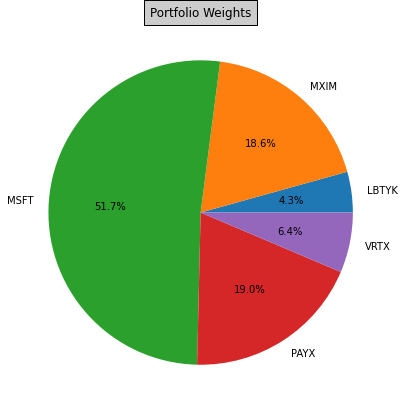

In [8]:
#visualizing the portfolio
from matplotlib import pyplot as plt

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(df2["weight"], labels = df2["stock"],autopct='%1.1f%%')
plt.title('Portfolio Weights',bbox={'facecolor':'0.8', 'pad':6})
# show plot
plt.show()

In [9]:
#performance evealuation
check_df = stocks2020[['NDX'] + list].iloc[1:,:]
T = len(check_df)
eval = 0
for time in range(T):
    qt = check_df.iloc[time]['NDX']
    return_val = check_df.iloc[time][list].to_list()
    eval += abs(qt - np.dot(weight, return_val))
eval

0.958124895061994

------------------------------------------------------

## Q3

Redo step (2) with m = 10, 20, ..., 90, 100 (obviously when m=100 you don’t need to solve for which stocks to include, because they’re all included). Analyze the performance of the portfolio for each value of m. How does the performance change? Is there some value of m, where there are diminishing returns of including more stocks in the portfolio? You can also look at the in- sample performance. That is, evaluate the performance in 2019 using 2019 portfolio construction and 2019 data. How is performance in 2019 different than performance in 2020? Why is it different? Be sure to write your code so that if there are more or fewer than 100 stocks in the csv file it stops at the right place.

AxesSubplot(0.125,0.125;0.775x0.755)


,m,eval 2020,eval 2019
0,5,0.95812,0.60664
1,10,0.69697,0.44524
2,20,0.61934,0.36652
3,30,0.50753,0.26420
4,40,0.34056,0.17531
5,50,0.31478,0.15672
6,60,0.29874,0.10059
7,70,0.27972,0.08810
8,80,0.29519,0.07961
9,90,0.24973,0.04574


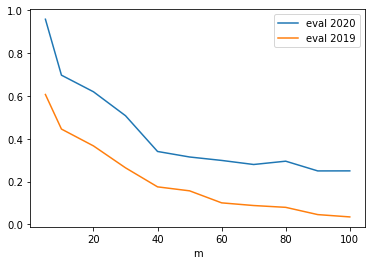

In [10]:
#iterating through the list of m to select stocks for each scenario
eval_2020 = []
eval_2019 = []
for m in m_list_valid:
    obj = []
    for i in range(n):
        for j in range(n):
            obj.append(Corr_mat.iloc[i,j])
    obj = np.array(obj+[0]*n)
    A = np.zeros((n+n**2+1,n**2+n))
    b = np.zeros(n+n**2+1)
    n_ranger = np.array(range(n))
    q = 0
    for j in range(n):
        b[q] = 1
        A[q,j*n + n_ranger] = 1
        q+=1   
    for i in range(n):
        for k in n_ranger*n +i:
            b[q] = 0
            A[q, k] = 1
            A[q, -n+i] = -1
            q+=1
    A[-1,-n:] = 1
    sense = np.array(['=']*n+['<']*n**2+['='])
    b[q] = m
    vtype=['B']*(n**2+n)
    biMod = gp.Model()
    biMod_x = biMod.addMVar(n**2+n,vtype=vtype) 
    portMod_con = biMod.addMConstrs(A, biMod_x, sense, b)
    biMod.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)
    biMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
    biMod.optimize()
    list = []
    for i in range(n):
        if biMod_x.x[-n:][i] == 1:
            list.append(stocks2019_l1.columns[i])
    stocks2019_l1[list]

    calculation_df = stocks2019[['NDX'] + list].iloc[1:,:]
    calculation_df
    t = len(calculation_df)
    obj = np.array([1]*t + [0]*m)
    A = np.zeros((2*t+1, len(obj)))
    b = np.zeros(2*t+1)
    sense = np.array(['>']*2*t+['='])
    i = 0
    y = 0
    for row in range(t):
        qt = calculation_df.iloc[row]['NDX']
        rit = calculation_df.iloc[row][list].to_list()
        A[i, y] = 1  
        A[i+1, y] = 1
        A[i, t:] = rit 
        A[i+1, t:] = [-x for x in rit] 
        b[i], b[i+1] = qt, -qt
        i += 2
        y += 1
    A[-1,-m:] = [1]*m
    b[-1] = 1
    biMod = gp.Model()
    biMod_x = biMod.addMVar(len(obj)) # vtype can be: 'C' or 'I' or 'B'
    biMod_con = biMod.addMConstrs(A, biMod_x, sense, b)
    biMod.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)
    biMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
    biMod.optimize()
    biMod.objVal
    weight = biMod.x[-m:]
    
    #performance evalulation for out-of-sample
    check_df = stocks2020[['NDX'] + list].iloc[1:,:]
    T = len(check_df)
    eval = 0
    for time in range(T):
        qt = check_df.iloc[time]['NDX']
        return_val = check_df.iloc[time][list].to_list()
        eval += abs(qt - np.dot(weight, return_val))
    eval_2020.append(eval)
    
    #performance evaluation for out of sample
    check_2019_df = stocks2019[['NDX'] + list].iloc[1:,:]
    T = len(check_df)
    eval = 0
    for time in range(T):
        qt = check_2019_df.iloc[time]['NDX']
        return_val = check_2019_df.iloc[time][list].to_list()
        eval += abs(qt - np.dot(weight, return_val))
    eval_2019.append(eval)
    #print(m,eval)
df = pd.DataFrame(columns = ['m', 'eval 2020', 'eval 2019'])
df['m'] = m_list_valid
df['eval 2020'] = eval_2020
df['eval 2019'] = eval_2019
#plotting the results
print(df.plot.line(x='m', y=['eval 2020', 'eval 2019']))
df

------------------------------------------------------

## Q4

Another way you could solve this problem is to completely ignore the stock selection IP and re- formulate the weight selection problem to be an MIP that constrains the number of non-zero weights to be an integer. To do this take the weight selection problem and replace m with n so
that you are optimizing over ALL weights: min ∑- |𝑞 − ∑' 𝑤 𝑟 |. Now define some
*
binary variables y1, y2, ..., yn and add some constraints that force wi = 0 if yi = 0 using the ‘big M’ technique (What’s the smallest value of big M you could use?). You also need to add a constraint that the sum of y’s is equal to m (m and M are different things here...). It turns out that this is a VERY hard problem for gurobi to solve. After 24 hours running on my desktop gurobi didn’t find a solution! We can force gurobi to quit looking for a solution after a specific amount of time by setting the TimeLimit value, in units of seconds, in the params list (the place where we tell gurobi to shut up). Redo parts 2 and 3 with this new method to find weights. For each value of m, limit gurobi to work for 1 hour. Which method works better on the 2020 data, the original method or this new method? Note that your code will need to run for up to 10 hours to create your final output. I would suggest that you plan ahead and set this to run overnight. You can set your Python file to save your results for this part to a csv file, and then you can also have it check to see if that csv file exists, if it exists grab those results without spending the 10 hours, and if it doesn’t then re-solve the problem. That way you only have to do the big solution once and you can still work on the formatting of your Python file. In your Python file create a clearly obvious variable at the top, that is equal to 3600, that you reference to limit gurobi’s time. This way when we grade your solutions, we can set it to something smaller to make sure your code works without having to wait 10 hours for everyone’s code to run.

We can Assume the value of M to be 1

In [11]:
#sample code for m=5 scenario with the MIP method
m=5
M=1
NDX_return_2019 = stocks2019.iloc[1:,:]['NDX']
stocks_return_2019 = stocks2019_l1.iloc[1:,:]
time = len(stocks_return_2019)
num2 = n 
obj = np.array([1]*time+[0]*num2+[0]*num2)

A = np.zeros((time*2+1+num2+1,len(obj)))
b = np.zeros(2*time+num2+1+1)

for i in range(time):
    A[i+1,i] = 1
    A[i+1,time:time+num2] = stocks_return_2019.iloc[i].tolist()
    A[i+1+time,i] = 1
    A[i+1+time,time:time+num2] = [i*(-1) for i in stocks_return_2019.iloc[i].tolist()]
    b[i+1]=((NDX_return_2019.iloc[i]))
    b[i+1+time]=((NDX_return_2019.iloc[i])*(-1))
    
for i in range(num2):
    A[2*time+1+i,time+i] = 1
    A[2*time+1+i,num2+time+i] = -1*M

A[1+time*2+num2,time+num2:] = 1 
b[1+time*2+num2] = m

sense = np.array(['='] + ['>']*2*time + ['<']*num2 + ['='])
vtype=['C']*time + ['C']*num2 + ['B']*num2

biMod = gp.Model()
biMod_x = biMod.addMVar(len(obj),vtype=vtype) 
biMod_con = biMod.addMConstrs(A, biMod_x, sense, b)
biMod.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)
biMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
biMod.Params.TimeLimit = time_limit
biMod.optimize()

#print(biMod_x.x)
list = []
weight=[]
for i in range(n):
    if biMod_x.x[time+i] != 0:
        list.append(stocks2019_l1.columns[i])
        weight.append(biMod_x.x[time+i])
df2 = pd.DataFrame(columns = ['stock', 'weight'])
df2['stock'] = list
df2['weight'] = weight
df2


,stock,weight
0,GOOGL,0.11610
1,AMZN,0.17096
2,ADI,0.11567
3,AAPL,0.16077
4,MSFT,0.27765


In [12]:
check_df = stocks2020[['NDX'] + list].iloc[1:,:]
T = len(check_df)
eval = 0
for time in range(T):
    qt = check_df.iloc[time]['NDX']
    return_val = check_df.iloc[time][list].to_list()
    eval += abs(qt - np.dot(weight, return_val))
eval

0.6232735438946407

Running for question 3 - multiple values of m

AxesSubplot(0.125,0.125;0.775x0.755)


,m,eval 2020,stocks,weights,eval 2019
0,5,0.62327,"GOOGL,AMZN,ADI,AAPL,MSFT","0.11610273477399062,0.1709554488036626,0.11567...",0.42787
1,10,0.47695,"ADBE,ALXN,GOOG,AMZN,AAPL,FB,INTC,MSFT,TXN,WBA","0.08231606750030371,0.02688551808054051,0.1023...",0.28183
2,20,0.34367,"ADBE,GOOGL,AMZN,AMGN,AAPL,AMAT,BIIB,BKNG,CSCO,...","0.044894490033269105,0.08972134820884689,0.105...",0.18526
3,30,0.35150,"AMD,GOOGL,AMZN,AMGN,ADI,AAPL,ADSK,ADP,BIDU,BII...","0.011493424201520497,0.08134038333073726,0.098...",0.12106
4,40,0.30753,"ATVI,ADBE,AMD,ALXN,GOOGL,AMZN,AMGN,AAPL,ADSK,A...","0.007249434933375022,0.023368515302869243,0.00...",0.08828
5,50,0.28977,"ATVI,ADBE,AMD,ALXN,GOOGL,GOOG,AMZN,AMGN,ADI,AA...","0.004067180033176219,0.025403973449725815,0.00...",0.06896
6,60,0.26575,"ATVI,ADBE,AMD,GOOGL,AMZN,AMGN,AAPL,ASML,ADP,BI...","0.0037720108846738478,0.01603204286105352,0.00...",0.05706
7,70,0.24969,"ATVI,ADBE,AMD,ALXN,GOOGL,GOOG,AMZN,AMGN,AAPL,A...","0.005062499748702437,0.020055266252574366,0.00...",0.04832
8,80,0.24184,"ATVI,ADBE,AMD,ALXN,GOOGL,GOOG,AMZN,AMGN,AAPL,A...","0.004121174926310277,0.01853325252277896,0.003...",0.04554
9,90,0.24386,"ATVI,ADBE,AMD,ALXN,GOOGL,GOOG,AMZN,AMGN,AAPL,A...","0.004116858850271998,0.016918516969962546,0.00...",0.04477


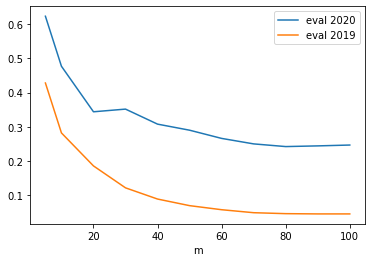

In [13]:
#MIP method with multiple values of m
eval_2020_new = []
eval_2019_new = []
weight_list = []
stock_list = []
for m in m_list_valid:
    M=1
    NDX_return_2019 = stocks2019.iloc[1:,:]['NDX']
    stocks_return_2019 = stocks2019_l1.iloc[1:,:]
    time = len(stocks_return_2019)
    num2 = n 
    obj = np.array([1]*time+[0]*num2+[0]*num2)

    A = np.zeros((time*2+1+num2+1,len(obj)))
    b = np.zeros(2*time+num2+1+1)

    for i in range(time):
        A[i+1,i] = 1
        A[i+1,time:time+num2] = stocks_return_2019.iloc[i].tolist()
        A[i+1+time,i] = 1
        A[i+1+time,time:time+num2] = [i*(-1) for i in stocks_return_2019.iloc[i].tolist()]
        b[i+1]=((NDX_return_2019.iloc[i]))
        b[i+1+time]=((NDX_return_2019.iloc[i])*(-1))
        
    for i in range(num2):
        A[2*time+1+i,time+i] = 1
        A[2*time+1+i,num2+time+i] = -1*M

    A[1+time*2+num2,time+num2:] = 1 
    b[1+time*2+num2] = m

    sense = np.array(['='] + ['>']*2*time + ['<']*num2 + ['='])
    vtype=['C']*time + ['C']*num2 + ['B']*num2

    biMod = gp.Model()
    biMod_x = biMod.addMVar(len(obj),vtype=vtype) 
    biMod_con = biMod.addMConstrs(A, biMod_x, sense, b)
    biMod.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)
    biMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
    biMod.Params.TimeLimit = time_limit
    biMod.optimize()

    #print(biMod_x.x)
    list = []
    weight=[]
    for i in range(n):
        if biMod_x.x[time+i] != 0:
            list.append(stocks2019_l1.columns[i])
            weight.append(biMod_x.x[time+i])
    df2 = pd.DataFrame(columns = ['stock', 'weight'])
    df2['stock'] = list
    df2['weight'] = weight
    
    #in-sample performance evaluation
    check_df = stocks2020[['NDX'] + list].iloc[1:,:]
    T = len(check_df)
    eval = 0
    for time in range(T):
        qt = check_df.iloc[time]['NDX']
        return_val = check_df.iloc[time][list].to_list()
        eval += abs(qt - np.dot(weight, return_val))
    eval_2020_new.append(eval)
    
    #out-of-sample performance evaluation
    check_df = stocks2019[['NDX'] + list].iloc[1:,:]
    T = len(check_df)
    eval = 0
    for time in range(T):
        qt = check_df.iloc[time]['NDX']
        return_val = check_df.iloc[time][list].to_list()
        eval += abs(qt - np.dot(weight, return_val))
    eval_2019_new.append(eval)
    stock_list.append(','.join(str(e) for e in list))
    weight_list.append(','.join(str(e) for e in weight))
df3 = pd.DataFrame(columns = ['m', 'eval 2020','stocks','weights'])
df3['m'] = m_list_valid
df3['eval 2020'] = eval_2020_new
df3['eval 2019'] = eval_2019_new
df3['stocks'] = stock_list
df3['weights'] = weight_list
#plotting the results
print(df3.plot.line(x='m', y=['eval 2020', 'eval 2019']))
df3

#### The previous code cell could be commented, as it took roughly 8hours to obtain the results. Hence the following code is saving the results to csv to aid with formatting later on

In [14]:
#saving the file as csv, so that it doesn't need to be re-run
df3.to_csv("Weights_after_run.csv")

,m,eval new method,eval old method
0,5,0.62327,0.95812
1,10,0.47695,0.69697
2,20,0.34367,0.61934
3,30,0.35150,0.50753
4,40,0.30753,0.34056
5,50,0.28977,0.31478
6,60,0.26575,0.29874
7,70,0.24969,0.27972
8,80,0.24184,0.29519
9,90,0.24386,0.24973


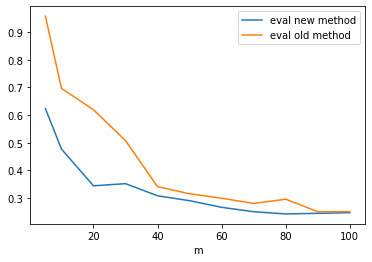

In [16]:
#Comparing the old and the new method
df5 = pd.read_csv("Weights_after_run.csv")
df4=df5.merge(df, on='m', how='inner')
df4.rename(columns={"eval 2020_x": "eval new method", "eval 2020_y": "eval old method"}, inplace=True)
df4.plot.line(x='m', y=['eval new method','eval old method'])
df4[['m','eval new method','eval old method']]


------------------------------------------------------